## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [ ]:
perc_na = crash_data.isna().mean()
drop_cols = list(perc_na[perc_na > 0.05].index)

crash_data = crash_data.drop(columns=drop_cols)
# Equivalent:
# crash_data = crash_data.drop(labels=drop_cols, axis=1)
# crash_data = crash_data.drop(labels=drop_cols, axis='columns')

print('Columns Dropped:')
drop_cols

Columns Dropped:


['LANE_CNT',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I']

Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [ ]:
corr_df = soccer_data.corr()
corr_df = corr_df[['Overall']]

# Overall to predict Overall is cheating
# id is a category not a number; correlations could be spurious
# perhaps learn more about why id does have a strongish corr and revisit
# if it does have value
corr_df = corr_df.drop(['Overall', 'ID'])

# we care about pos and neg (aka we care about magnitude)
# so we'll look at absolute value
corr_df['abs_corr_overall'] = corr_df['Overall'].abs()

corr_df = corr_df.sort_values('abs_corr_overall', ascending=False)
corr_df.head(5)

,Overall,abs_corr_overall
Reactions,0.847739,0.847739
Composure,0.801749,0.801749
ShortPassing,0.722720,0.722720
BallControl,0.717933,0.717933
LongPassing,0.585104,0.585104


Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: `f_regression` and `mutual_info_regression`. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [ ]:
X = soccer_data.drop(columns=['ID', 'Overall', 'Name'])
y = soccer_data['Overall']

In [ ]:
selector = SelectKBest(f_regression, k=5)

selector.fit(X, y)
selector.transform(X)

X.columns[selector.get_support()]

Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')

In [ ]:
selector = SelectKBest(mutual_info_regression, k=5)

selector.fit(X, y)
selector.transform(X)

X.columns[selector.get_support()]

Index(['ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure'], dtype='object')

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

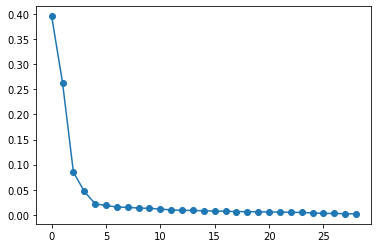

In [ ]:
pca = PCA()

pca.fit(X)

plt.plot(pca.explained_variance_ratio_, '-o')
plt.show()

In [ ]:
pca = PCA(n_components=4)

pca.fit(X)
pcs = pca.transform(X)

pc_df = pd.DataFrame(pcs)
pc_df

,0,1,2,3
0,149.506330,43.713611,0.752635,-1.014699
1,132.251162,45.030474,35.464546,-40.506396
2,133.728950,38.197314,-7.738917,-6.077153
3,96.639506,94.488072,8.744123,4.224887
4,129.262863,39.657663,-5.819357,-8.245789
...,...,...,...,...
16117,-40.617118,-52.950247,-16.274155,27.242249
16118,-28.820710,-104.893219,37.006653,24.398556
16119,-4.651104,-102.544705,-3.156333,7.876790
16120,-3.859406,-89.748716,-6.022118,29.416610


In [ ]:
full_df = pd.concat((soccer_data, pc_df), axis='columns')
corr_df = full_df.corr()
corr_df = corr_df[[0,1,2,3]]
corr_df = corr_df.drop([0,1,2,3,'ID'])

# If you dont care about dir of corr
# drop the abs if you care about direction of corr and reconsider the sort potentially
corr_df.abs().sort_values(0, ascending=False).style.background_gradient()

,0,1,2,3
Finishing,0.905130,0.021605,0.226459,0.056407
Positioning,0.856596,0.207288,0.053574,0.113929
Volleys,0.840906,0.184206,0.242384,0.008217
LongShots,0.824332,0.339492,0.191542,0.054337
Dribbling,0.813926,0.340316,0.184340,0.052890
Penalties,0.755542,0.115589,0.306655,0.066172
Curve,0.743434,0.450504,0.080260,0.171085
Vision,0.728135,0.471614,0.032145,0.158468
BallControl,0.708984,0.529992,0.005518,0.020377
ShotPower,0.704002,0.378893,0.339404,0.013222
